Lebanese American University - Script Programming Assignment - Gaëlle Loutfi

***

<p style='text-align:justify; font-size:16px'>A gene is a region of DNA consisting of several coding parts (called exons), interspersed by non-coding parts (called introns). The coding parts are concatenated to form a string of nucleotides called mRNA, where occurrences of the letter T in the coding parts are substituted by the letter U. A triplet of mRNA letters codes for a specific amino acid, which are the building blocks of proteins. These consecutive triplets of letters in the mRNA are translated into its corresponding protein sequence of amino acids.
</p>

<img src="https://img.freepik.com/premium-vector/dna-replication-rna-mrna-protein-synthesis-translation-biological-functions-dna-medical-illustration_313437-1371.jpg?w=2000" alt="Gene Expression" style="width:700px">

***

***

<font color=green size=5px>**Part 1**</font>
<div style='text-align:justify; font-size:16px'>

<br>The first part of the assignment consists of writing a python script that maps a gene sequence into its corresponding protein sequence.
<br>Three input files are needed for this assignment. Make sure to place them in the same directory as your Python script.

1.	**“gene_sequence.txt”:** the nucleotide sequence of the gene in question.
2.	**“exon_position.txt”:** contains the start and end positions of the exon regions. Each line holds the start and end positions of an exon region. To form the mRNA, only the exon regions (the coding parts) of the gene must be combined while replacing the letter T by the letter U.
3.	**“code.txt”:** contains the mapping of mRNA triplets to amino acids. The first column is the mRNA triplet, while the other columns represents the 1-letter symbol, a 3-letter name, and the full name of the corresponding amino acid. To create the protein, we replace the triplets of the mRNA strings by the corresponding 1-letter symbol.
<br>

<font color=red><strong>ATTENTION:</strong></font> the translation always begins with the amino acid Methionine, code AUG, and ends when one of the <b>three</b> stop codons is met (check the code.txt file). You must thus check for the correct start and stop criteria.<br>
Store the protein sequence/string in a file, split on multiple lines with 80 characters per line. It is a good practice to have a separate folder for the files being created. Save that file in a folder named “output” and test whether this folder exists, and if not, create this folder.
</div>

## The code below will define the first function needed for the assignment: 

The function `AA_dict()` will create a dictionary that corresponds to the genetic code. In other words it will match each codon (3 nucleotides) to the corresponding amino acid using the file **"code.txt"** provided by the instructor.

It will do so using:

* a for loop to read the contents of the file line by line 
* indices to take away only the codon and the 1-letter code of the amino acid. 

It is important to note that the Stop codons will match an "X" character.

Also, the os module was imported. It will be of use later on.


In [1]:
import os

def AA_dict():
    code_dict = {}
    with open ("code.txt","r") as genetic_code:
        for line in genetic_code:
            fields=line.strip().split()
            code_dict[fields[0]]=fields[1]
    return code_dict


The following cell contains the function `cstring(string,csize)` which contains 2 parameters:

* **string**: which is the input string
* **csize**: which is the size of the segments the string will be divided into


In [2]:
def cstring(string,csize):
    chunk=[string[i:i+csize] for i in range(0, len(string), csize)]
    return chunk

The following cell starts by making sure that a directory is made, wheere the obtained protein sequence will be stored. 

After that, the file **gene_sequence.txt** will be read, and after being stripped accordingly, the sequence will be stored in a variable called **gene_seq**. 

The genetic code dictionary is stored in **gen_code**

In [3]:
if not os.path.exists("output"):
    os.makedirs("output")
    
gen_code=AA_dict()

gene_DNA_file=open("gene_sequence.txt","r")
gene_seq=gene_DNA_file.read().strip()
gene_seq=gene_seq.replace("\n","")


The following cell will start by defining the function `exons_only_DNA(unspliced)`, it will:
* take the gene sequence containing both introns and exons as parameter
* open the file **exon_positions.txt** and read it line by line in order to match the span of the exons to the part that is being extracted from the original gene sequence. 
* these parts are concateated and stored in a variable *exons_seq* which will be returned by the function 

The function is then called in order to obtain the exons-only/coding DNA sequence. This sequence is then printed. 

After that, the Thymines (T) will be replaced by Uracil (U) in order to obtain the mRNA sequence (*mRNA_seq*), which will be printed as well.

In [4]:
def exons_only_DNA(unspliced):
    exon_file=open("exon_positions.txt","r")
    exon_lines=exon_file.readlines()
    
    exon_seq=""
    for line in exon_lines:
        x=line.split()
        start=int(x[0])
        end=int(x[1])
        
        exon_seq+=unspliced[start:end]
        
    return exon_seq
    
exon_seq=exons_only_DNA(gene_seq)
print("The coding sequence is: \n\n"+exon_seq+"\n\n")
mRNA_seq=exon_seq.replace("T","U")
print("The mRNA sequence is: \n\n"+mRNA_seq+"\n\n")


The coding sequence is: 

GTTCCTAGAAAATGGAGCTGTCTTGGCATGTAGTCTTTATTGCCCTGCTAAGTTTTTCATGCTGGGGGTCAGACTGGGAGTCTGATAGAAATTTCATTTCCACCGCTGGTCCTCTAACCAATGACTTGCTGCACAACCTGAGTGGTCTCCTGGGAGACCAGAGTTCTAACTTTGTAGCAGGGGACAAAGACATGTATGTTTGTCACCAGCCACTGCCCACTTTCCTGCCAGAATACTTCAGCAGTCTCCATGCCAGTCAGATCACCCATTATAAGGTATTTCTGTCATGGGCACAGCTCCTCCCAGCAGGAAGCACCCAGAATCCAGACGAGAAAACAGTGCAGTGCTACCGGCGACTCCTCAAGGCCCTCAAGACTGCACGGCTTCAGCCCATGGTCATCCTGCACCACCAGACCCTCCCTGCCAGCACCCTCCGGAGAACCGAAGCCTTTGCTGACCTCTTCGCCGACTATGCCACATTCGCCTTCCACTCCTTCGGGGACCTAGTTGGGATCTGGTTCACCTTCAGTGACTTGGAGGAAGTGATCAAGGAGCTTCCCCACCAGGAATCAAGAGCGTCACAACTCCAGACCCTCAGTGATGCCCACAGAAAAGCCTATGAGATTTACCACGAAAGCTATGCTTTTCAGGGCGGAAAACTCTCTGTTGTCCTGCGAGCTGAAGATATCCCGGAGCTCCTGCTAGAACCACCCATATCTGCGCTTGCCCAGGACACGGTCGATTTCCTCTCTCTTGATTTGTCTTATGAATGCCAAAATGAGGCAAGTCTGCGGCAGAAGCTGAGTAAATTGCAGACCATTGAGCCAAAAGTGAAAGTTTTCATCTTCAACCTAAAACTCCCAGACTGCCCCTCCACCATGAAGAACCCAGCCAGTCTGCTCTTCAGCCTTTTTGAAGCCATAAATAAAGACCAAGTGCTCACCATTGGGTTTGATATTAATGAGTTTCTGAGT

The following cell will first define the function `translation(mRNA_seq)` which will:
* initialize an empty string called *protein_seq* and a False boolean *AUG_found* which indicates if the start codon was found.
* a for loop will then loop through the mRNA sequence. It will check if any character (indexed by i), when concetenated with the 2 characters that succeed it (so i->i+3), will match a start 'AUG' codon. If it does, the index of this start codon in the sequence will then be stored in "j", and AUG_found will then become true. 
* this "j" will then be used as the starting index in the next for loop that will move in steps of 3 to loop through the mRNA sequence starting from this start codon. This loop will convert every 3 characters (every 3 nucleotides/ every codon) into their corresponding amino acid which is gotten from the genetic code dictionary, and this amino acid will be appended to previously empty protein sequence. 
* the amino acids are going to keep on being added until a stop codon, which is the codon that will match an "X" in the dictionary is found. Upon finding this stop codon the loop is broken out of and the protein sequence is returned by the function. 

After that, the function `translation(mRNA_seq)` is called and given the previously extracted and printed mRNA sequence as an input. The output is stored in a variable called *proteinSeq* and printed out. 

In [5]:

def translation(mRNA_seq):
    protein_seq=""
    AUG_found=False
    
    for i in range(0,len(mRNA_seq),1):
        if(mRNA_seq[i:i+3]=="AUG"):
            j=i
            break
    
    for i in range(j, len(mRNA_seq),3):
        codon=mRNA_seq[i:i+3]
        if codon=="AUG":
            AUG_found=True
        if AUG_found and codon in gen_code:
            aa=gen_code[codon]
            if aa=="X":
                break
            protein_seq+=aa
            
    return protein_seq

proteinSeq=translation(mRNA_seq)
print("The protein sequence is \n\n"+proteinSeq+"\n\n")

The protein sequence is 

MELSWHVVFIALLSFSCWGSDWESDRNFISTAGPLTNDLLHNLSGLLGDQSSNFVAGDKDMYVCHQPLPTFLPEYFSSLHASQITHYKVFLSWAQLLPAGSTQNPDEKTVQCYRRLLKALKTARLQPMVILHHQTLPASTLRRTEAFADLFADYATFAFHSFGDLVGIWFTFSDLEEVIKELPHQESRASQLQTLSDAHRKAYEIYHESYAFQGGKLSVVLRAEDIPELLLEPPISALAQDTVDFLSLDLSYECQNEASLRQKLSKLQTIEPKVKVFIFNLKLPDCPSTMKNPASLLFSLFEAINKDQVLTIGFDINEFLSCSSSSKKSMSCSLTGSLALQPDQQQDHETTDSSPASAYQRIWEAFANQSRAERDAFLQDTFPEGFLWGASTGAFNVEGGWAEGGRGVSIWDPRRPLNTTEGQATLEVASDSYHKVASDVALLCGLRAQVYKFSISWSRIFPMGHGSSPSLPGVAYYNKLIDRLQDAGIEPMATLFHWDLPQALQDHGGWQNESVVDAFLDYAAFCFSTFGDRVKLWVTFHEPWVMSYAGYGTGQHPPGISDPGVASFKVAHLVLKAHARTWHHYNSHHRPQQQGHVGIVLNSDWAEPLSPERPEDLRASERFLHFMLGWFAHPVFVDGDYPATLRTQIQQMNRQCSHPVAQLPEFTEAEKQLLKGSADFLGLSHYTSRLISNAPQNTCIPSYDTIGGFSQHVNHVWPQTSSSWIRVVPWGIRRLLQFVSLEYTRGKVPIYLAGNGMPIGESENLFDDSLRVDYFNQYINEVLKAIKEDSVDVRSYIARSLIDGFEGPSGYSQRFGLHHVNFSDSSKSRTPRKSAYFFTSIIEKNGFLTKGAKRLLPPNTVNLPSKVRAFTFPSEVPSKAKVVWEKFSSQPKFERDLFYHGTFRDDFLWGVSSSAYQIEGAWDADGKGPSIWDNFTHTPGSNVKDNATGDIACDSYHQLDADLNMLRALKVKAY

The following cell will specify the path needed in order to store the output sequence **protein_sequence.txt** in the output directory. However, using the cstring function, the sequence will be stored in the text file as 80 characters/amino acids per line.

A print statement will announce that the file has been created and it will mention the file name in order to find it more easily.

The file is then closed, end of writing. 

In [6]:
output_path=os.path.join("output","protein_sequence.txt")
output_file=open(output_path,"w")
for i in cstring(proteinSeq,80):
    output_file.write(i+"\n")
    
print ("\n\nFile is successfully created! \nOpen protein_sequence.txt to view the previously printed protein sequence")
output_file.close()



File is successfully created! 
Open protein_sequence.txt to view the previously printed protein sequence


<font color=green size=5px>**Part 2**</font>
<div style='text-align:justify; font-size:16px'>

<br>The second part consists of computing some statistics about the content in amino acids of the protein sequence that was previously obtained (in Part 1).

20 different standard amino acids exist in proteins (A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y), and these amino acids are divided into 4 categories according to their properties:
-	Positively charged: R, H, K
-	Negatively charged: D, E
-	Polar: N, C, Q, S, T, Y
-	Non-polar : A, I, L, M, F, P, W, V, G
</div>

<div style='text-align:justify; font-size:16px'>

The goal of this assignment is to ONLY use Python programming language to write a script that starts by displaying the following menu on the screen:<br>
1) ALL<br>
2) Per category<br>
3) Within category<br>
4) Specific AA<br>

    
> 1) If the user selects this option, the script will calculate the frequency and percentage of each of the 20 amino acid in the protein sequence and print the results in a table sorted in <b>reverse numerical order</b> according to the percentage values. The table must contain 3 columns that correspond to the amino acid one-letter, its frequency and its percentage.
    
> 2) If the user selects this option, the script will do the same as in (1), but the displayed results will be per amino acids category. The table will contain only 4 rows, each corresponding to an amino acid category. 

> 3) If the user selects this option, he/she will be prompted to choose one category from the four, and the script will display the frequency and percentage of each amino acid belonging to this category. In this case, the percentage of the amino acid is computed by dividing its frequency over the total number of amino acids belonging to the same category.
    
> 4) If the user select this option, he/she will be prompted to enter the one-letter code of the amino acid of interest, and the script will just compute and print the percentage of that specific amino acid. Return an error message if the user enters an invalid one-letter code.
    
<br>For the first three options **(1, 2, and 3)**, the script will also return a plot to illustrate graphically the results of the frequency and percentage (2 y-axis scales can be used for each of the 2 metrics). You can use any data visualization library that is supported in Python Jupyter Notebooks (*Matplotlib, Seaborn, Plotly …*). An interactive plot will be a plus. 
</div>

* Part 2 started with an import of different libraries such as os, matplotlib.pyplot as plt, seaborn as sns, and pandas as pd that will be used later on in the code. The os library provides a way to interact with the operating system, and the other libraries are used for the visualization of the graphs. 

* The code embarked with a while loop to guide the user for which input he/she would like to choose, the inputs are divided into several categories, the all categroy, the per category, the within category, and specific amino acid.  


### Now if the user has chosen number 1 (i.e. the all category), a sentence will be displayed informing him that he chose this category in particular.

* Amino acids' lists are initialized according to their categories, (i.e., positively charged, negatively charged, polar, and non-polar).

* The os library is then used, for it checks if the path of the targeted folder (output) exists, and if not it created a new directory of this output folder. 

* Then, the "protein_sequence" text file is opened as read mode and then is stripped to neglect any unwanted spaces.
* A new function called `calculate_amino_acid_stats()` is defined and takes the protein sequence as its only parameter.
    * This function initializes 2 dictionaries, the "amino_acid_freq" and the amino_acid_percent, which are used to store the         frequency and percentage of each amino acid. 
    * It then count the number of occurences of each amino acid in the protein sequence using a for loop.
    * Then, it calculates the percentage of each amino acid in the protein sequence using a for loop that oterates over aa and frequency in amino_acid_dreq.items(), and then over every aa, t calculates it freq/ total length of the protein sequence and multiplies it by 100 in order to get its percentage.  
    * It then returns the previously initialized dictionaries of amino acid frequency and percentage. 
* Another function is defined called `print_amino_acid_table` takes the previously defined function as its only parameter. 
    * This function uses the new string format way to print the AA, Frequency, and Percentage(%) strings and prints a border after it including 30 dashes (-)
    * It then initializes a for loop
        * This for loop takes the aa and percent as its variables in the sorted() function that takes the amino_acid_stats.items() as one of its parameters and sorts it by its keys in ascending order, but using key=lambda x: x[1] allows us to sort the dictionary by its values in descending order.
        * It then prints the aa, freq, and percentage using a formatted string. 
* We then calculated the amino acid stats and printed the table
* A list of containing all amino acids is created called "all_amino_acids"

***FOR THE GRAPH AND VISUALIZATIONS***

1. Creates a figure object (fig) and an axis object (ax1) with dimensions of 10 by 6 inches, using the subplots() method from the matplotlib.pyplot module.
2. Uses the seaborn library to create a bar plot on ax1. The x-axis of the plot shows the names of all the amino acids, and the y-axis shows the frequency of each amino acid in the protein. The color of the bars is set to blue.
3. Sets the title of the plot to 'Amino Acid Frequency and Percentage', with a font size of 16, using the set_title() method.
4. Sets the label of the x-axis to 'Amino Acid', with a font size of 14, using the set_xlabel() method.
5. Sets the label of the y-axis for ax1 to 'Frequency', with a font size of 14 and color of blue, using the set_ylabel() method.
6. Creates a twin axis object (ax2) that shares the same x-axis with ax1, using the twinx() method. This allows two y-axes to be displayed on the same plot, one for frequency and one for percentage.
7. Uses seaborn to create a line plot on ax2. The x-axis of the plot shows the names of all the amino acids, and the y-axis shows the percentage of each amino acid in the protein. The color of the line is set to red.
8. Sets the label of the y-axis for ax2 to 'Percentage', with a font size of 14 and color of red, using the set_ylabel() method.
9. Displays the plot using the show() method from matplotlib.pyplot.
10. The break statement is used to terminate any enclosing for or while loop immediately.

### Now if the user has chosen number 2 (i.e. the per category), a sentence will be displayed informing him that he chose this category in particular.

* The os library is used to check whether the path of the targeted folder (output) exists, and if not it created a new directory of this output folder.

* Then, the "protein_sequence" text file is opened as read mode and then is stripped to neglect any unwanted spaces.
* We defined four lists that represent different categories of amino acids: positively charged amino acids (pos_aa), negatively charged amino acids (neg_aa), polar amino acids (polar_aa), and non-polar amino acids (all the remaining amino acids in the amino_acids list).
* We then created a list of all amino acids by concatenating the four lists created above and some additional amino acids (A, I, L, M, F, P, W, V, and G).
* An empty dictionary was initialized that is called freq_dict to store the frequency of each amino acid category.
* We then used a for loop to iterate through all the amino acids in amino_acids.
    * For each amino acid, checks which category it belongs to and updates the count of that category in the freq_dict dictionary. The count() method is used to count the number of occurrences of the amino acid in the protein sequence.
    * Computes the total number of amino acids in the protein sequence by summing the values in the freq_dict dictionary.
* We initialized an empty dictionary called percent_dict to store the percentage of each amino acid category.
* We then used a dictionary comprehension to compute the percentage of each amino acid category by dividing the frequency of each category by the total number of amino acids and multiplying by 100. The percentage values are rounded to two decimal places using the round() function.
* The resulting freq_dict and percent_dict dictionaries can be used to visualize the distribution of amino acid categories in the protein sequence, for example, by creating a pie chart or a bar chart.
* We created a sorted list of category names (category_names) by sorting the keys of the freq_dict dictionary in descending order of their values. This means that the most common amino acid category will appear first in the list.
* We then also created two lists (category_freq and category_perc) to store the frequency and percentage of each amino acid category, respectively. The values in these lists are obtained by iterating over the category_names list and looking up the corresponding values in the freq_dict and percent_dict dictionaries.
* We printed out a header row for the table, with column names for amino acid category, frequency, and percentage. The <20 format specifier is used to left-align the text and ensure that each column is 20 characters wide.
* We used a for loop to iterate over the first 4 elements of the category_names list (i.e., the 4 most common amino acid categories).
    * For each amino acid category, prints out a row in the table showing the category name, frequency, and percentage. The <20 format specifier is used again to left-align the text and ensure that each column is 20 characters wide.
    
***FOR THE GRAPH AND VISUALIZATIONS***

1. Uses matplotlib to create a subplot with one figure (fig) and one axis (ax1).
2. Plots a bar graph using ax1.bar, with the category names on the x-axis (category_names), the frequency of each category on the y-axis (category_freq), and blue bars (color='b') with a width of 0.4.
3. Sets the x-axis label (ax1.set_xlabel) to "Amino acid category", the y-axis label (ax1.set_ylabel) to "Frequency", and the y-axis tick color (ax1.tick_params) to blue.
4. Creates a second y-axis (ax2) on the right-hand side of the plot (ax2 = ax1.twinx()).
5. Plots a line graph using ax2.plot, with the category names on the x-axis (category_names), the percentage of each category on the y-axis (category_perc), red circular markers (marker='o'), and a line width of 2 (linewidth=2).
6. Sets the y-axis label (ax2.set_ylabel) to "Percentage" and the y-axis tick color (ax2.tick_params) to red.
7. Explicitly sets the tick locations on the x-axis to be at each category (ax1.set_xticks) and sets the x-axis tick labels to be rotated 45 degrees (ax1.set_xticklabels).
8. Adjusts the subplot layout to make room for the rotated x-axis tick labels (fig.subplots_adjust).
9. Sets the title of the plot (plt.title) to "Amino Acid Categories and Composition".
10. Displays the plot (plt.show).
11. Uses a break statement to exit the loop indicating that the function that the user chose via its number is successfuly done.

### Now if the user has chosen number 3 (i.e. the within category), a sentence will be displayed informing him that he chose this category in particular.
​
* Amino acids' are initialized according to their categories, (i.e., charged_pos, charged_neg, polar, and non-polar).
​
* The os library is then used, for it checks if the path of the targeted folder (output) exists, and if not it created a new directory of this output folder. 
​
* Then, the "protein_sequence" text file is opened as read mode and then is stripped to neglect any unwanted spaces.
* This code prompts the user to select an amino acid category and then determines the amino acids in the selected category. 

    * The first two lines prompt the user to select an amino acid category and list the available categories, including positively charged, negatively charged, polar, and non-polar.

    * The category_num variable is assigned the user's input, which is an integer corresponding to the selected category number.

    * The code then enters an if-elif-else block that determines the amino acids in the selected category based on the value of category_num.

    * If category_num is 1, the category variable is assigned the charged_pos list of positively charged amino acids, and the category_name variable is assigned the string "Positively charged".

    * If category_num is 2, the category variable is assigned the charged_neg list of negatively charged amino acids, and the category_name variable is assigned the string "Negatively charged".

    * If category_num is 3, the category variable is assigned the polar list of polar amino acids, and the category_name variable is assigned the string "Polar".

    * If category_num is 4, the category variable is assigned the non_polar list of non-polar amino acids, and the category_name variable is assigned the string "Non-polar".

    * If category_num is none of the above, the code prints an error message and exits the program.
    
* We then calculated the frequency and percentage of each amino acid in the selected category and then prints the results.

    1) The freq dictionary is initialized as an empty dictionary.

    2) The code enters a for loop that iterates over each amino acid in the category list and calculates the frequency of that amino acid in the protein_seq sequence using the count() method. The frequency of each amino acid is then stored in the freq dictionary with the amino acid as the key and the frequency as the value.

    4) The total_aa variable is assigned the sum of all the values in the freq dictionary, which corresponds to the total number of amino acids in the selected category.

    5) The percentage dictionary is initialized as an empty dictionary, and a for loop is used to iterate over each amino acid and its corresponding frequency in the freq dictionary. The percentage of each amino acid is calculated as (count/total_aa)*100, and the percentage is then stored in the percentage dictionary with the amino acid as the key and the percentage as the value.

    6) The code then prints the header for the results table, which includes the selected category name.

    7) Another for loop is used to iterate over each amino acid and its corresponding frequency in the freq dictionary. For each amino acid, the code prints the amino acid symbol, the frequency, and the percentage in parentheses, formatted to two decimal places using the .2f format specifier.
    
***FOR THE GRAPH AND VISUALIZATIONS***

1) The code first creates a DataFrame using the pd.DataFrame() function. The DataFrame contains three columns: "Amino acid", "Frequency", and "Percentage". The values for these columns are extracted from the freq and percentage dictionaries.

2) The sns.set_style() function sets the plotting style to "whitegrid".

3) The plt.subplots() function creates a figure with two subplots: ax1 and ax2.

4) The ax2 = ax1.twinx() command creates a second y-axis that shares the same x-axis as ax1.

5) The sns.barplot() function creates a bar plot of the amino acid frequencies. The x-axis is set to "Amino acid", the y-axis is set to "Frequency", the data is set to df, the color of the bars is set to blue, and the ax parameter is set to ax1.

6) The sns.lineplot() function creates a line plot of the amino acid percentages. The x-axis is set to "Amino acid", the y-axis is set to "Percentage", the data is set to df, the marker is set to "o", the sort parameter is set to False to keep the x-axis order, the color of the line is set to red, and the ax parameter is set to ax2.

7) The ax1.set_ylabel() function sets the label for the y-axis of ax1 to "Frequency".

8) The ax2.set_ylabel() function sets the label for the y-axis of ax2 to "Percentage".

9) The ax1.set_title() function sets the title of the plot to "Amino Acid Frequencies in the selected category name Category", where category_name is the name of the selected category.

10) The plt.show() function displays the plot.

11) Uses a break statement to exit the loop indicating that the function that the user chose via its number is successfuly done.

### Now if the user has chosen number 4 (i.e. the per amino acid), a sentence will be displayed informing him that he chose this category in particular.
* The user will be asked to input an amino acid one-letter code. If it is not valid, an error message will be displayed. 

* If it is valid, the % of that amino acid in the previously obtained protein sequence will be calculated (dividing the count by the total amino acid sequence length), rounded to only 2 decimal places maximum, and displayed. 


          Please select an option: 
          1) ALL
          2) Per category
          3) Within category
          4) Specific AA
          
Enter the number of your selected option (1-4):
1

            You selected the option "ALL"
            This will display a table showing the percentage and frequency of each amino acid in the protein sequence
            
            
 AA  Frequency Percentage (%)
------------------------------
  L     170       8.71   
  S     161       8.25   
  A     149       7.64   
  G     126       6.46   
  D     116       5.95   
  F     111       5.69   
  P     106       5.43   
  V     106       5.43   
  R     105       5.38   
  T     103       5.28   
  E     102       5.23   
  I      90       4.61   
  Y      87       4.46   
  N      82       4.20   
  Q      80       4.10   
  K      76       3.90   
  H      59       3.02   
  W      53       2.72   
  M      26       1.33   
  C      19       0.97   


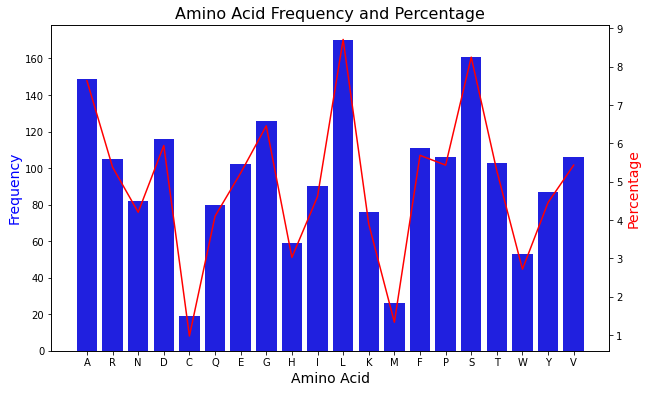

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

while True:
    print("""
          Please select an option: 
          1) ALL
          2) Per category
          3) Within category
          4) Specific AA
          """)
    
    
    choice=input("Enter the number of your selected option (1-4):\n")
    
    if choice=="1":
        print("""
            You selected the option "ALL"
            This will display a table showing the percentage and frequency of each amino acid in the protein sequence
            
            """)
        
        # Define the amino acid categories
        positively_charged = ['R', 'H', 'K']
        negatively_charged = ['D', 'E']
        polar = ['N', 'C', 'Q', 'S', 'T', 'Y']
        non_polar = ['A', 'I', 'L', 'M', 'F', 'P', 'W', 'V', 'G']

        # Check if the output directory exists, create it if necessary
        if not os.path.exists('output'):
            os.mkdir('output')

        # Load the protein sequence from the text file
        with open('output/protein_sequence.txt', 'r') as f:
            protein_sequence = f.read().strip()

        def calculate_amino_acid_stats(protein_sequence):
            # Initialize dictionaries to store the frequency and percentage of each amino acid
            amino_acid_freq = {aa:0 for aa in 'ARNDCQEGHILKMFPSTWYV'}
            amino_acid_percent = {}

            # Count the number of occurrences of each amino acid in the protein sequence
            for aa in protein_sequence:
                if aa in amino_acid_freq:
                    amino_acid_freq[aa] += 1

            # Calculate the percentage of each amino acid in the protein sequence
            total_length = len(protein_sequence)
            for aa, freq in amino_acid_freq.items():
                amino_acid_percent[aa] = freq / total_length * 100

            # Return the dictionaries of amino acid frequency and percentage
            return amino_acid_freq, amino_acid_percent


        # Define a function to print a table of amino acid stats sorted by percentage
        def print_amino_acid_table(amino_acid_stats):
            print('{:^5}{:<10}{:<10}'.format('AA', 'Frequency', 'Percentage (%)'))
            print('-' * 30)
            
            for aa, percent in sorted(amino_acid_stats.items(), key=lambda x: x[1], reverse=True):
                #By default, the sorted() function sorts a dictionary by its keys in ascending order,
                #but using key=lambda x: x[1] allows us to sort the dictionary by its values in descending order.
                freq = amino_acid_freq[aa]
                print('{:^5}{:^10}{:^10.2f}'.format(aa, freq, percent))

        # Calculate the amino acid stats and print the table
        amino_acid_freq, amino_acid_percent = calculate_amino_acid_stats(protein_sequence)
        print_amino_acid_table(amino_acid_percent)

        # Create a list of all possible amino acids
        all_amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

        # Create a barplot of amino acid frequency and percentage
        fig, ax1 = plt.subplots(figsize=(10,6))

        sns.barplot(x=all_amino_acids, y=[amino_acid_freq[aa] for aa in all_amino_acids], color='blue', ax=ax1)

        ax1.set_title('Amino Acid Frequency and Percentage', fontsize=16)

        ax1.set_xlabel('Amino Acid', fontsize=14)

        ax1.set_ylabel('Frequency', color='blue', fontsize=14)


        ax2 = ax1.twinx()

        sns.lineplot(x=all_amino_acids, y=[amino_acid_percent[aa] for aa in all_amino_acids], color='red', ax=ax2)

        ax2.set_ylabel('Percentage', color='red', fontsize=14)

        plt.show()    
        break
    elif choice=="2":
        print("""
            You selected the option "Per Category"
            This will display a table showing the percentage and frequency of each amino acid Category in the protein sequence
            
            """)  
     
        # Protein sequence
        with open('output/protein_sequence.txt') as f:
            seq = f.read().strip()

        # Amino acid categories
        pos_aa = ["R", "H", "K"]
        neg_aa = ["D", "E"]
        polar_aa = ["N", "C", "Q", "S", "T", "Y"]
        amino_acids = pos_aa + neg_aa + polar_aa + ["A", "I", "L", "M", "F", "P", "W", "V", "G"]

        # Compute the frequency and percentage of each amino acid category
        freq_dict = {}
        for aa in amino_acids:
            if aa in pos_aa:
                freq_dict['Positively charged'] = freq_dict.get('Positively charged', 0) + seq.count(aa)
            elif aa in neg_aa:
                freq_dict['Negatively charged'] = freq_dict.get('Negatively charged', 0) + seq.count(aa)
            elif aa in polar_aa:
                freq_dict['Polar'] = freq_dict.get('Polar', 0) + seq.count(aa)
            else:
                freq_dict['Non-polar'] = freq_dict.get('Non-polar', 0) + seq.count(aa)

        total_aa = sum(freq_dict.values())
        percent_dict = {k: round(v / total_aa * 100, 2) for k, v in freq_dict.items()}

        # Create a sorted list of category names and corresponding values
        category_names = sorted(freq_dict, key=freq_dict.get, reverse=True)
        category_freq = [freq_dict[k] for k in category_names]
        category_perc = [percent_dict[k] for k in category_names]

        # Print table
        print(f"{'Amino acid category':<20} {'Frequency':<20} {'Percentage (%)':<20}")
        print("----------------------------------------------------------")
        for i in range(4):
            print(f"{category_names[i]:<20} {category_freq[i]:<20} {category_perc[i]:<20}")

        # Plot the results
        fig, ax1 = plt.subplots()

        ax1.bar(category_names, category_freq, color='b', width=0.4)
        ax1.set_xlabel('Amino acid category')
        ax1.set_ylabel('Frequency', color='b')
        ax1.tick_params(axis="y", labelcolor="b")

        ax2 = ax1.twinx()
        ax2.plot(category_names, category_perc, color='r', marker='o', linewidth=2)
        ax2.set_ylabel('Percentage', color='r')
        ax2.tick_params(axis="y", labelcolor="r")

        # Explicitly set the tick locations
        ax1.set_xticks(range(len(category_names)))
        # Set x-axis tick labels to be rotated 45 degrees
        ax1.set_xticklabels(category_names, rotation=45)

        # Adjust the subplot layout to make room for the rotated x-axis tick labels
        fig.subplots_adjust(bottom=0.2)

        plt.title("Amino Acid Categories and Composition")
        plt.show()

        break
    elif choice=="3":
         print("""
            You selected the option "Within Category"
            This will display the percentage of each amino acid belonging to the selected Category the protein sequence
            
            """)
         # Define the amino acid categories
         charged_pos = "RHK"
         charged_neg = "DE"
         polar = "NQCSYTW"
         non_polar = "AILMFPWVG"

         # Prompt the user to enter the protein sequence
         with open('output/protein_sequence.txt') as f:
             protein_seq = f.read().strip()

         # Prompt the user to select an amino acid category
         print("Select an amino acid category:")
         print("1. Positively charged")
         print("2. Negatively charged")
         print("3. Polar")
         print("4. Non-polar")
         category_num = int(input("Enter the category number: "))
         print("\n")
         # Determine the amino acids in the selected category
         if category_num == 1:
             category = charged_pos
             category_name = "Positively charged"
         elif category_num == 2:
             category = charged_neg
             category_name = "Negatively charged"
         elif category_num == 3:
             category = polar
             category_name = "Polar"
         elif category_num == 4:
             category = non_polar
             category_name = "Non-polar"
         else:
             print("Invalid category number. Exiting...")
             exit()

         # Calculate the frequency and percentage of each amino acid in the selected category
         freq = {}
         for aa in category:
             freq[aa] = protein_seq.count(aa)
         total_aa = sum(freq.values())
         percentage = {aa: (count/total_aa)*100 for aa, count in freq.items()}

         # Print the results
         print("Amino Acid Frequencies in the", category_name, "Category:")
         for aa, count in freq.items():
             print(aa+":",count,"({:.2f}%)".format(percentage[aa]))

         # Create a bar plot to display the results
         df = pd.DataFrame({"Amino acid": list(freq.keys()), "Frequency": list(freq.values()), "Percentage": list(percentage.values())})
         sns.set_style("whitegrid")
         fig, ax1 = plt.subplots()
         ax2 = ax1.twinx()
         sns.barplot(x="Amino acid", y="Frequency", data=df, color="blue", ax=ax1)
         sns.lineplot(x="Amino acid", y="Percentage", data=df, marker="o", sort=False, color="red", ax=ax2)
         ax1.set_ylabel("Frequency", color='b')
         ax2.set_ylabel("Percentage", color='r')
         ax1.set_title("Amino Acid Frequencies in the " + category_name + " Category")
         plt.show()

         break
    elif choice=="4":
         print("""
            You selected the option "Specific AA"
            This will display the percentage of the selected amino acid in the protein sequence
            
            """)
         if not os.path.exists('output'):
            os.mkdir('output')
 #remaking the dictionary from part 1 just in case
         def AA_dict():
                code_dict={}
                with open ("code.txt","r") as genetic_code:
                    for line in genetic_code:
                        fields=line.strip().split()
                        code_dict[fields[0]]=fields[1]
                return code_dict
            
         gen_code=AA_dict()
         
#getting the protein sequence from the ouput file in part 1
         with open('output/protein_sequence.txt', 'r') as f:
            proteineye = f.read().strip()   
            
            #asking the user for the desired 1-letter code:
         aminoyeye=input("Please enter the one-letter code of the amino acid of choice: ")
         aa_values= gen_code.values() #getting the values of the dictionary
            
         #calculating the %
         if aminoyeye in aa_values:
             aa_nb= proteineye.count(aminoyeye) 
             length=len(proteineye)
             percent=round((aa_nb/length)*100,2) 
             
             
             statmnt= "The percentage of the amino acid with the one-letter code "+aminoyeye+ " in the protein sequence is "+str(percent)+"%"
             print(statmnt)
         else:
             print("Please chose a valid amino acid one-letter code. ")
         
       
         break
    else:
        print("Invalid choice, please try again! ")

<font color=green size=5px>**Part 3**</font><br>
<div style='text-align:justify; font-size:16px'>
<br>
The last part of the assignment is to investigate a human disease related to the gene in question. This disease is caused by a mutation of the nucleotide in position 30049 (0-based), a mutation from T to A.


The goal is to check what happens to the protein if this nucleotide is mutated. Compare the length of the mutated protein to the length of the non-mutated gene. State your conclusion.
</div>

### The following code will use the functions previously defined in part 1: `exons_only_DNA(unspliced)`, `translation(mRNA_seq)`.

It will proceed as such: 
1. As in part 1 it will extract the gene sequence from its text file, and store it in the *gene_seq* variable. 
2. The T at position 30049 will be replaced by an A using string slicing. The new mutated gene sequence will be stored in a new variable *exon_seq_mut* since strings are immutable.
3. The mutated DNA sequence is then printed.
4. The DNA is converted to mRNA by replacing T with U and the mRNA sequence (*mRNA_seq_mut*) is also printed. 
5. using the translation function, the mRNA sequence is converted to the corresponding mutated protein sequence *protein_seq_mut*.
6. This protein sequence is printed. Moreover its length is calculated and printed as well as the the length of the initial non-mutated protein sequence. 


In [8]:
gene_DNA_file= open("gene_sequence.txt", "r")

gene_seq = gene_DNA_file.read().strip()
gene_seq = gene_seq.replace("\n","")


gene_seq_mut=gene_seq[:30049]+"A"+gene_seq[30050:] #the end is exclusive 

    
exon_seq_mut=exons_only_DNA(gene_seq_mut)


print("The coding sequence of the mutated gene is: \n\n"+exon_seq_mut+"\n\n")

mRNA_seq_mut = exon_seq_mut.replace("T", "U")
print("The mRNA sequence is: \n\n"+mRNA_seq_mut+"\n\n")

protein_seq_mut=translation(mRNA_seq_mut)

a=str(len(protein_seq_mut))
b=str(len(proteinSeq))

print("\n\nThe protein sequence is: \n\n"+protein_seq_mut)
print("\nthe length of this sequence is "+a+" while the length of the original non mutated protein sequence was "+b)



The coding sequence of the mutated gene is: 

GTTCCTAGAAAATGGAGCTGTCTTGGCATGTAGTCTTTATTGCCCTGCTAAGTTTTTCATGCTGGGGGTCAGACTGGGAGTCTGATAGAAATTTCATTTCCACCGCTGGTCCTCTAACCAATGACTTGCTGCACAACCTGAGTGGTCTCCTGGGAGACCAGAGTTCTAACTTTGTAGCAGGGGACAAAGACATGTATGTTTGTCACCAGCCACTGCCCACTTTCCTGCCAGAATACTTCAGCAGTCTCCATGCCAGTCAGATCACCCATTATAAGGTATTTCTGTCATGGGCACAGCTCCTCCCAGCAGGAAGCACCCAGAATCCAGACGAGAAAACAGTGCAGTGCTACCGGCGACTCCTCAAGGCCCTCAAGACTGCACGGCTTCAGCCCATGGTCATCCTGCACCACCAGACCCTCCCTGCCAGCACCCTCCGGAGAACCGAAGCCTTTGCTGACCTCTTCGCCGACTATGCCACATTCGCCTTCCACTCCTTCGGGGACCTAGTTGGGATCTGGTTCACCTTCAGTGACTTGGAGGAAGTGATCAAGGAGCTTCCCCACCAGGAATCAAGAGCGTCACAACTCCAGACCCTCAGTGATGCCCACAGAAAAGCCTATGAGATTTACCACGAAAGCTATGCTTTTCAGGGCGGAAAACTCTCTGTTGTCCTGCGAGCTGAAGATATCCCGGAGCTCCTGCTAGAACCACCCATATCTGCGCTTGCCCAGGACACGGTCGATTTCCTCTCTCTTGATTTGTCTTATGAATGCCAAAATGAGGCAAGTCTGCGGCAGAAGCTGAGTAAATTGCAGACCATTGAGCCAAAAGTGAAAGTTTTCATCTTCAACCTAAAACTCCCAGACTGCCCCTCCACCATGAAGAACCCAGCCAGTCTGCTCTTCAGCCTTTTTGAAGCCATAAATAAAGACCAAGTGCTCACCATTGGGTTTG

We can obviously see that the protein has been truncated, which means that the substitution resulted in a stop codon instead of the amino acid that was supposed to be at position 1340.

Let's first check which amino acid was present at this position before the mutation: 


In [9]:
print("the amino acid that was substituted is " +proteinSeq[1389]) #indexing starts at 0 !


the amino acid that was substituted is Y


In [10]:
value = {i for i in gen_code if gen_code[i]=="Y"} #using list comprehensions!
print("The Codon that was mutated is either: ",value)

The Codon that was mutated is either:  {'UAC', 'UAU'}


To find out which of these was present we'll look at the stop codons:

In [11]:
value = {i for i in gen_code if gen_code[i]=="X"}
print("The stop codons are:  ",value)

The stop codons are:   {'UAA', 'UGA', 'UAG'}


Knowing that all Ts were converted to Us in the transcription from DNA to mRNA, we can see that the codon that was previously UAU, aka a tyrosine became UAA, aka a stop codon. (we can infer that in the orginial gene sequence TAT became TAA) 

We have previously dicussed how this mutation impacted the protein on the amino acid level and the size. 

Now let us look at how this truncation impacted the function of the protein as a whole. 

* We will first use Uniprot to BLAST the non-mutated full protein sequence. (https://www.uniprot.org/blast)
* A 100% hit was obtained, it matches the human Lactase/phlorizin hydrolase, uniprot ID: P09848 
* In its entry, it is stated that this protein functions as a broad specificity glycosidase of the intestinal brush border membrane that hydrolyzes lactose, the main sugar in mammalian milk, to produce D-glucose and D-galactose.


As we looked at the variants in the *variants viewer* section (https://www.uniprot.org/uniprotkb/P09848/variant-viewer), we were able to find the specific variant that results from the previously mentioned mutation at position 1390. 

The variant ID on uniprot is:

**CA118360
RCV000006964
rs121908936**

This section shows that the disease is associated with *Congenital lactase deficiency*, which is a form of lactose intolerance. The severe gastrointestinal disorder is characterized by watery diarrhea in infants fed with breast milk or other lactose-containing formulas. In a 2005 study **(DOI: 10.1086/500053)**, this mutation was found to be one of the 5 mutations that are known to cause such a disease. However, this is the most frequent one as it was seen in 84% of patients. 

Furthermore, the data from the study demonstrated that, "in contrast to common adult-type hypolactasia (lactose intolerance) caused by a variant of the regulatory element, the severe infancy form represents the outcome of *mutations affecting the structure of the protein inactivating the enzyme*".

So we can conclude that this nonesense mutation lead to the inactivation of the protein through the modification of its functional structure. 


* Reference article: Kuokkanen M, Kokkonen J, Enattah NS, Ylisaukko-Oja T, Komu H, Varilo T, Peltonen L, Savilahti E, Jarvela I. Mutations in the translated region of the lactase gene (LCT) underlie congenital lactase deficiency. Am J Hum Genet. 2006 Feb;78(2):339-44. doi: 10.1086/500053. Epub 2005 Dec 15. PMID: 16400612; PMCID: PMC1380240.
